In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/Населення_України"

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
response.raise_for_status()

tables = pd.read_html(StringIO(response.text))
print(f"На сторінці {len(tables)} таблиць.")


На сторінці 72 таблиць.


In [2]:
for i, t in enumerate(tables):
    print(f"\nТаблиця {i}:")
    print(t.head())


Таблиця 0:
          0            1
0  Точність  переглянута

Таблиця 1:
                                   Населення України  \
0  Статево-вікова піраміда населення України на 1...   
1                                        Чисельність   
2                                            Густота   
3                                Коефіцієнт міграції   
4                                      Природний рух   

                                 Населення України.1  
0  Статево-вікова піраміда населення України на 1...  
1                   ▼ 40,96 млн (1 лютого 2022) осіб  
2                                   ▼ 68,2 особи/км²  
3                                             ▲0,9 ‰  
4                                      Природний рух  

Таблиця 2:
    0                                                  1
0 NaN  На цьому місці має відображатися графік чи діа...

Таблиця 3:
    0                                                  1
0 NaN  На цьому місці має відображатися графік чи діа...

Таблиц

In [3]:
df = tables[13]

df.columns = df.columns.str.replace(r'\[\d+\]', '', regex=True)
num_cols = df.columns[1:]
for col in num_cols:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
if df[num_cols].max().max() > 50:
    df[num_cols] = df[num_cols] / 10
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


In [4]:
print("\nРозмір таблиці:", df.shape)


Розмір таблиці: (28, 9)


In [5]:
df = df.replace("—", np.nan)

In [6]:
print("Типи всіх стовпців таблиці:\n", df.dtypes)

Типи всіх стовпців таблиці:
 Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [7]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
print("\nЧастка пропусків у кожній колонці:")
skip_percent = df.isnull().sum() / len(df)
print(round(skip_percent, 2))


Частка пропусків у кожній колонці:
Регіон    0.00
1950      0.07
1960      0.04
1970      0.04
1990      0.00
2000      0.00
2012      0.00
2014      0.07
2019      0.14
dtype: float64


In [9]:
df = df.iloc[:-1, :]
print(df.tail())

          Регіон  1950  1960  1970  1990  2000  2012  2014  2019
22     Черкаська  20.5  17.9  14.4  12.3   7.5  10.0   9.8   6.4
23   Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
24  Чернігівська  22.0  18.3  12.7  10.8   6.9   9.4   9.0   6.1
25          Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26   Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN


In [10]:
mean_values = df[num_cols].mean()
df[num_cols] = df[num_cols].fillna(mean_values).round(1)

print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0


In [11]:
mean_2019 = df["2019"].mean().round(2)
higher_2019 = df[df["2019"] > mean_2019]["Регіон"]

print("Середнє по Україні у 2019 році:", mean_2019)
print("\nРегіони з народжуваністю вище середнього у 2019 році:")
print(higher_2019.tolist())

Середнє по Україні у 2019 році: 8.01

Регіони з народжуваністю вище середнього у 2019 році:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [12]:
max_2014_region = df.loc[df["2014"].idxmax(), "Регіон"]
print("\nРегіон з найвищою народжуваністю у 2014 році:", max_2014_region, "область")


Регіон з найвищою народжуваністю у 2014 році: Рівненська область


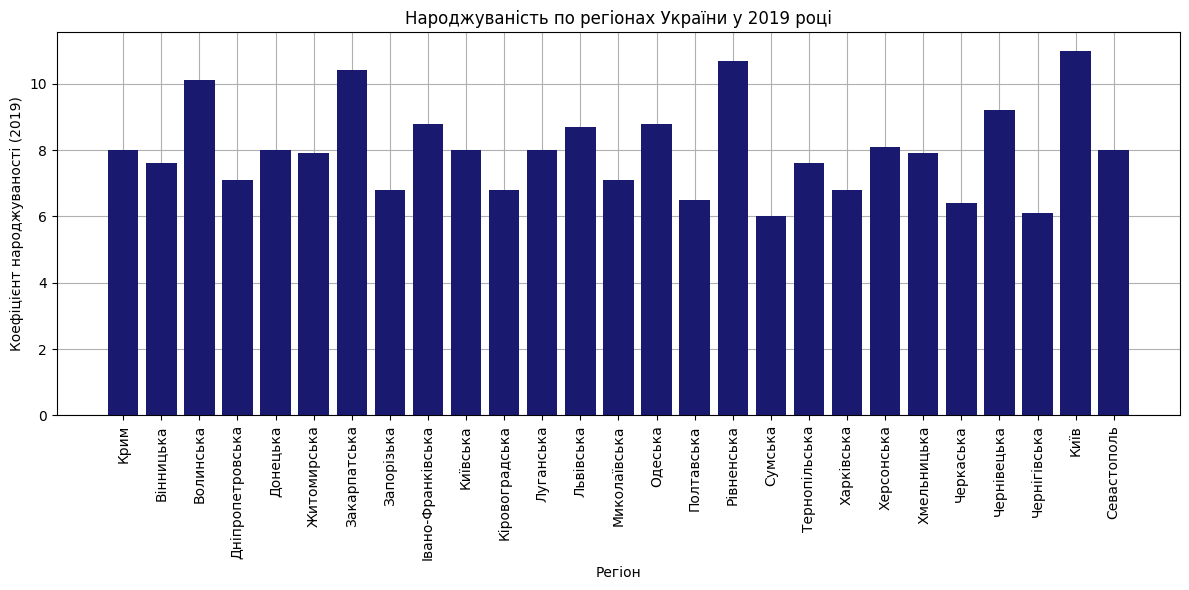

In [13]:
plt.figure(figsize=(12,6))
plt.bar(df["Регіон"], df["2019"], color='midnightblue', zorder=2)
plt.xticks(rotation=90)
plt.xlabel("Регіон")
plt.ylabel("Коефіцієнт народжуваності (2019)")
plt.title("Народжуваність по регіонах України у 2019 році")
plt.tight_layout()
plt.grid(zorder=1)
plt.show()

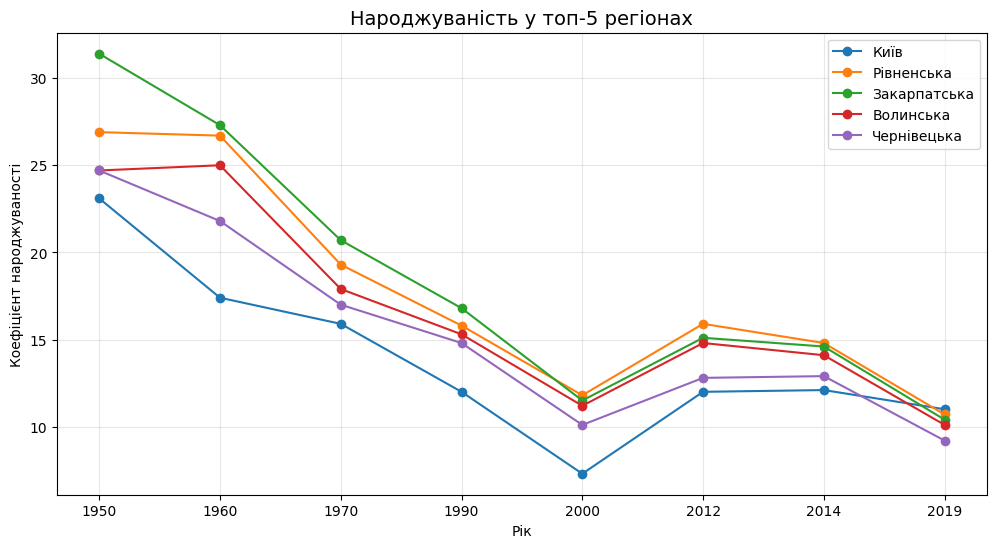

In [14]:
plt.figure(figsize=(12,6))
top5_regions = df.sort_values("2019", ascending=False).head(5)["Регіон"]

for region in top5_regions:
    plt.plot(num_cols, df.loc[df["Регіон"]==region, num_cols].values.flatten(), marker='o', label=region)

plt.title("Народжуваність у топ-5 регіонах", fontsize=14)
plt.xlabel("Рік")
plt.ylabel("Коефіцієнт народжуваності")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


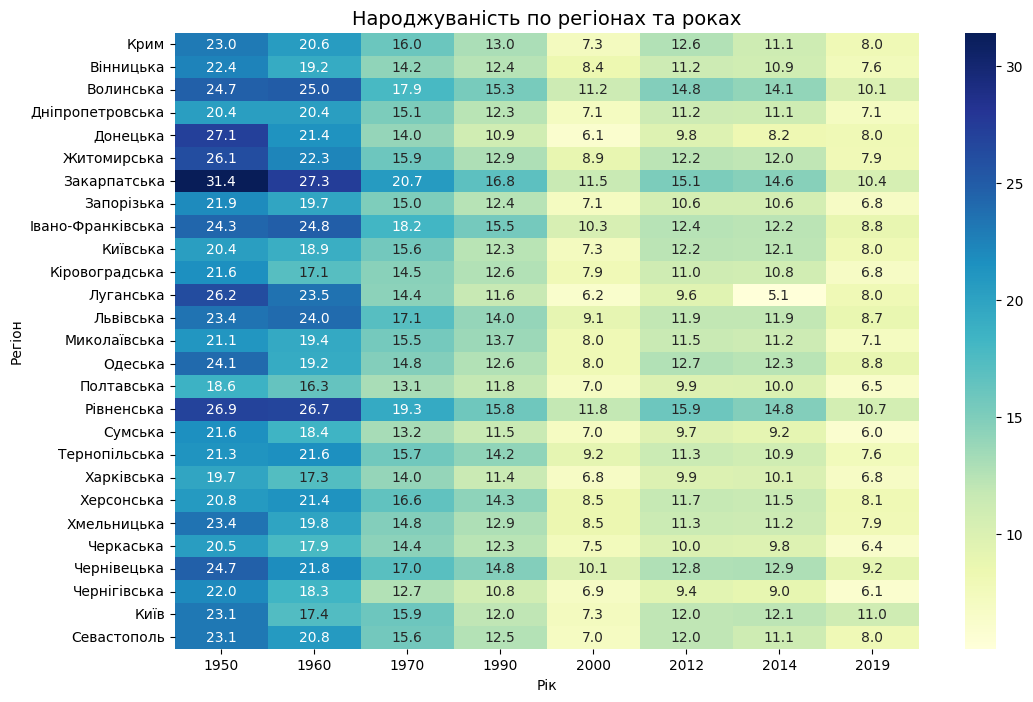

In [16]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.set_index("Регіон")[num_cols], annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Народжуваність по регіонах та роках", fontsize=14)
plt.xlabel("Рік")
plt.ylabel("Регіон")
plt.show()

/tmp/ipython-input-286477658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="Рік", y="Народжуваність", palette="pastel")


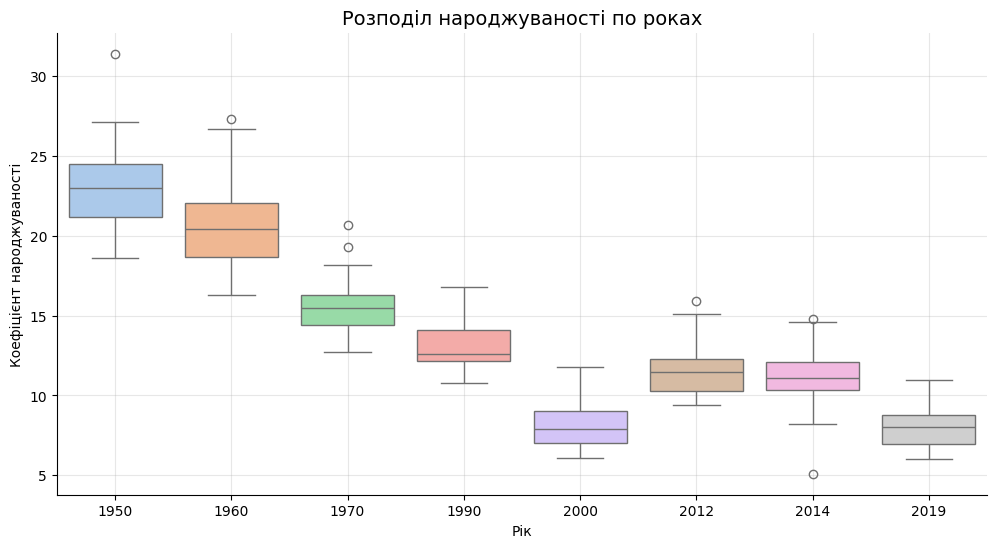

In [17]:
df_long = df.melt(id_vars="Регіон", value_vars=num_cols, var_name="Рік", value_name="Народжуваність")

plt.figure(figsize=(12,6))
sns.boxplot(data=df_long, x="Рік", y="Народжуваність", palette="pastel")
plt.title("Розподіл народжуваності по роках", fontsize=14)
plt.xlabel("Рік")
plt.ylabel("Коефіцієнт народжуваності")
plt.grid(alpha=0.3)
sns.despine()
plt.show()
